# Vorhersage von Hauspreisen mit Regressionsmethoden

In dieser Übung werden Sie den bekannten *Ames Housing Datensatz* von Dean De Cock analysieren. Dieser enthält 79 erklärende Variablen, um den Preis eines Hauses vorherzusagen. Dieser Datensatz ist quasi der komplexere *Bruder* des Boston House Pricing Datasets. Für weitere Informationen können Sie sich das PDF unter diesem Link http://ww2.amstat.org/publications/jse/v19n3/decock.pdf anschauen.

### Was werden wir in dieser Übung tun?
- Die Daten explorativ erkunden
- Features aufbereiten (Feature preparation), um diese an Machine Learning Modellen zu übergeben
- Ergebnisse evaluieren
- Ranking der erklärenden Variablen erstellen

**Anmerkung**: In dieser Übung werden Sie Code ergänzen müssen oder teilweise selber schreiben. Lesen Sie daher die Anweisungen genau, da sich dort meistens Hinweise für die Lösungen befinden.

## 1. Laden der benötigten Paketen und des Datensatzes
Laden Sie bitte die Pakete **pandas** als **pd** und **seaborn** als **sns** mit dem **import** Befehl. Fügen Sie außerdem die Zeile **%matplotlib inline** hinzu, damit Plots direkt in Seaborn ohne den Befehl *plt.show()* angezeigt werden.
Anschließend lesen Sie bitte die CSV File **'data/houses.csv'** als DataFrame ein und weisen diesem den Namen **houses** zu.

**Tipp**: Denken Sie daran, dass ihnen die Taste *Tab* viel Schreibarbeit und Recherchearbeit spart. Außerdem können Sie sich mit *Shift + Tab* innerhalb der Klammern einer Methode oder Funktion die Beschreibung und Argumente anschauen.

In [ ]:
# Laden der Pakete und matplotlib Einstellung
import <FILL-IN> as pd
import <Fill-IN>
%mat<Fill-IN>

In [1]:
# Laden der Pakete und matplotlib Einstellung

#Lösung:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Laden des Datensatzes
<FILL-IN> = <FILL-IN>('houses.csv')

In [2]:
# Laden des Datensatzes

#Lösung
houses = pd.read_csv('houses.csv')

Nutzen Sie bitte die **.head()**, **.info()** und **.describe()** Methoden, um sich einen ersten Überblick über den Datensatz zu verschaffen.

In [3]:
# head
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# info
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#describe 
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Versuchen Sie bitte mit dem generetierten Output folgende Fragen zu beantworten:
- Wieviele Einträge hat der Datensatz?
- Wieviele Spalten gibt es?
- Wieviele numerische und nicht-numerische Spalten gibt es?
- Welches Feature hat die meisten Null Values?

Unter diesem Link https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt können Sie mehr über die verschiedenen Featuers erfahren.

## 2. Data Exploration
In diesem Abschnitt geht es darum, den Datensatz besser zu verstehen und uns an einige pandas und seaborn skills zu erinnern.

Zunächst möchten wir ein **Histogram** erstellen, um uns die Verteilung der Target-Variable **SalePrice** anzuschauen. Verwenden Sie hierfür die Seaborn-Methode **distplot()**. Setzen Sie außerdem **kde auf False** und ändern Sie die Anzahl der verwendeten **bins auf 30**.

In [ ]:
# Histogramm
sns.<FILL-IN>

/opt/hdp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


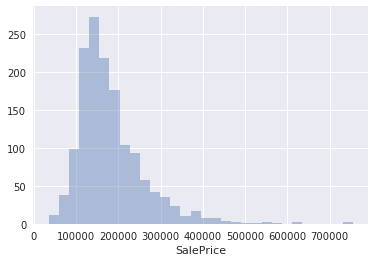

In [6]:
# Lösung
sns.distplot(houses['SalePrice'], bins=30, kde=False)

**Bitte beschreiben Sie, was Sie sehen und Ihnen auffällt**

### Lösung:

Die Verteilung hat ein Maximum bei ca. 150.000 $. Bis zum Maximum is der Anstieg recht steil, nach dem Maximum, insbesondere im "Tail-Bereich" der Verteilung ist der Abfall flacher im vgl. Dies bedeutet, dass die Verteilung leicht schief ist. Dies können wir beispielsweise mit dem Befehl .skew() auch quantitativ bestätigen. Ein positiver Wert bedeutet, dass der Tail auf der rechten seite länger/flacher ist als auf der linken Seite. Falls die Verteilung symmetrisch wäre, dann wäre der Mean=Median. Andernfalls lässt sich keine einfache Aussage treffen. Da wir aber außerdem viele Ausreißer zur rechten Seite sehen, ist der Median sehr wahrscheinlich kleiner als der Mean.

In [ ]:
# Lösung:
houses.SalePrice.skew()

Sie haben vermutlich festgestellt, dass die Verteilung leicht schief ist und es einige Ausreißer zur rechten Seite gibt. 
Als Ausreißer definieren wir die Beobachtungen, für die gilt:

$$ SalePrice > mean + 3 \times std $$
und
$$ SalePrice < mean - 3 \times std $$,

wobei *mean* der Mittelert der Hauspreise ist und *std* die Standardabweichung.

**Bestimmen Sie bitte die Anzahl der Ausreißer.**

Den *mean* und die *Standardabweichung* können wir mit den Methoden **df['Spalte'].std()** und **.mean()** berechnen. Die Ausreißer zur rechten und linken Seite können wir dann mit **conditional Indexing** extrahieren.

In [ ]:
#Lösung:

std = <FILL-IN>
mean = <FILL-IN>

housesOutliersRight = houses[(abs(houses['SalePrice']) > <FILL-IN>)]
housesOutliersLeft = <FILL-IN>

len(<FILL-IN>) + len(<FILL-IN>)

22

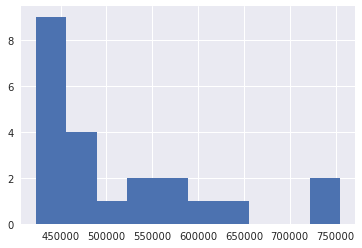

In [7]:
#Lösung:

std = houses.SalePrice.std()
mean = houses.SalePrice.mean()

housesOutliersRight = houses[(abs(houses['SalePrice']) > (mean + 3 * std))]
housesOutliersLeft = houses[(abs(houses['SalePrice']) < (mean - 3 * std))]

# Lösung
housesOutliersRight.SalePrice.hist()

len(housesOutliersRight) + len(housesOutliersLeft)

Nun wollen wir uns die Paar-Korrelationen zwischen den erklärenden Variablen und der Target Variablen anschauen. Vielleicht entdecken wir dadurch schon wichtige Features. Hierfür berechnen wir zunächst die Korrelationsmatrix der numerischen Variablen mit der Methode **.corr()**, die wir direkt auf das DataFrame houses anwenden können. Anschließend wollen wir diese Matrix in Form einer **Heatmap** plotten.

Tipp: Wenn wir die Methoden .corr() anwenden, dann werden automatisch nur die numerischen Spalten berücksichtigt.

In [ ]:
# Berechnung der Korrelationsmatrix corr (Rückgabe ist ein DataFrame)
corr = <FILL-IN>

# Lassen Sie sich die ersten fünf Zeilen der Matrix anzeigen
<FILL-IN>

In [8]:
# Lösung

# Es werden automatisch nur die numerischen Features verwendet
corr = houses.corr()
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


Die Ergebnisse die Sie nun sehen sind Werte für den sog. Pearson Korrelationskoeffizienten.
Dieser lässt sich wie folgt berechnen:

$$ r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}, $$

wobei $s_x$ bzw $s_y$ die Standardabweichung ist. Die Summe verläuft über alle Observations $i$.

Um die Daten zu visualisieren verwenden wir die heatmap Methode von seaborn. Zusätzlich wenden wir noch einige Modifikationen mit matplotlib und numpy an, um die generierte Grafik zu verändern. 

In [9]:
# Import von Matplotlib und Numpy
import matplotlib.pyplot as plt
import numpy as np

Da das *customizen* dieses Plots nicht auf anhieb ersichtlich ist, führen Sie die unteren Zeilen bitte einfach nur aus.

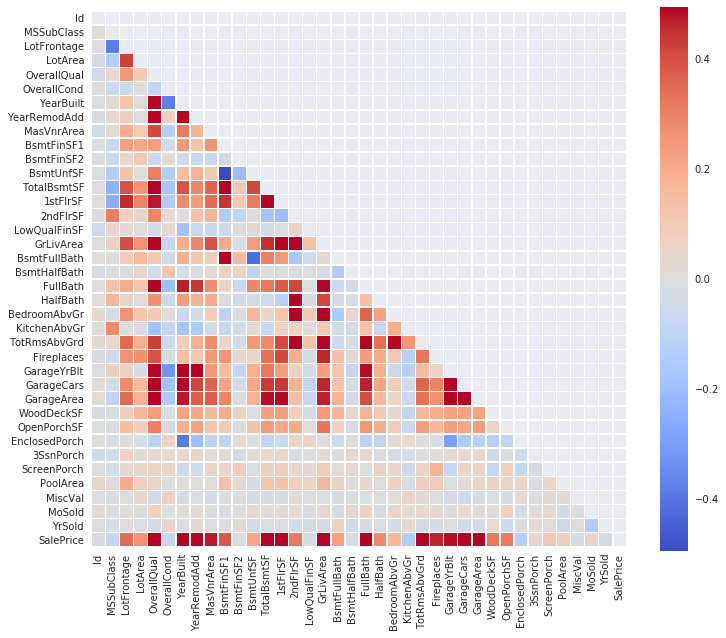

In [10]:
# Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.3, square=True)

Im nächsten Schritt hätten wir gerne eine Liste der am stärksten korrelierten und antikorrelierten Größen. Auch hier bitte Ich sie den Code einfach auszuführen.

Anmerkung: Falls es Sie interessiert was diese Satements tun, können Sie diese zerlegen und sich die einzelnen Output der verschachtelten und verketteten Statements anschauen.

In [11]:
# Ausführen
cond = np.triu(np.ones(corr.shape), k=1).astype(np.bool)
os = corr.where(cond).stack().sort_values(ascending=False)

# multilvl index
# pos correlation
os[:,'SalePrice'].head(5)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
dtype: float64

In [12]:
# neg correlation
os[:,'SalePrice'].tail(5)

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

Denken Sie daran, dass eine monetäre Korrelation von ungefähr 0 Ihnen nicht sagen kann, ob das Feature und das Target voneinander unabhängig sind. Bei einer quadratischen Abhängigkeit zwischen Target und Feature würde der Korrelationskoeffizient beispielsweise 0 ergeben.
Dieser oben erwähnte Sachverhalt ist recht gut im Diagramm auf der englischen Wikipediaseite https://en.wikipedia.org/wiki/Correlation_and_dependence veranschaulicht.

**Frage**: Was bedeuten unsere bisher erzielten Ergebnisse? Denken Sie, dass wir mit diesen Features die Hauspreise vorhersagen können?

**Bonus**: Natürlich kann man die Daten noch viel mehr erkunden. Wenn Sie möchten, dann können Sie sich beispielsweise Scatterplots der Features mit dem größten Korrelationskoeffizienten bzgl. des SalePrice anschauen, um sich die Abhängkeit genauer anzuschauen.
Oder plotten Sie die Verteilung des TargetLabels unter Berücksichtigung verschieder Ausprägungen kategorischer Features (Tipp: Boxplots).

## 3. Feature Preparation
Nachdem wir festgestellt haben, dass unsere Features das Target erklären könnten, wollen wir die Featurea soweit vorbereiten, dass wir damit ein Machine Learning Modell "füttern" können. Folgende Schritte sind hierfür notwendig:

0. Aufsplitten der Daten in ein Trainingsdatensatz und Testdatensatz
1. Droppen der irrelevanten Spalten
2. Füllen der NaN Werte
3. Kategorische Variablen in numerische kodieren
4. Eventuell Features skalieren

Da manche Schritte bereits **Fitting** beinhalten, wie z.B. das Füllen von NaN Values mit dem Median (der Median ist dann ein "Fit-Resultat" aus dem Datensatz), müssen wir unseren Datensatz bereits *splitten*. Üblicherweise trennt man seinen Datensatz in ein Trainingsdatensatz, mit dem alle **Fitting** Schritte durchgeführt werden und einen Testdatensatz, mit dem wir das Modell anschließend evaluieren können.

Zunächst droppen Sie bitte die irrelevante Spalte **Id** mit dem **.drop()** Befehl. Verwenden Sie bitte die Option **inplace=True**, um direkt das DataFrame zu verändern. Denken Sie an das **axis** Argument.

In [ ]:
# Droppen Sie bitte die irrelevante Spalte Id und nutzen Sie 
houses.drop(<FIll-IN>)

In [13]:
#Lösung

# Droppen Sie bitte die irrelevante Spalte Id und nutzen Sie 
houses.drop('Id', axis=1, inplace=True)

### Trainung und Testdaten

Für das aufsplitten der Daten verwenden wir die Methode **train_test_split** aus dem Modul **sklearn.model_selection**.

In [14]:
# Laden der Methode
from sklearn.model_selection import train_test_split

Schauen Sie sich die möglichen Argumente mit der *Shift+Tab* Methode an. Hier wird ihnen nicht ersichtlich, was Sie genau an Argumente übergeben können. Per Konvention bedeutet ein Stern vorm Namen, dass wir eine Array oder eine Liste an Objekten übergeben können, wobei zwei Sternchen bedeutet, dass wir eine Collections aus Keywork Arguments übergeben können, beispielsweise ein Python Dictionary oder mehrere *named* Variables.

Wir verwenden die Methode wie folgt: Als erstes Argument übergeben wir unser DataFrame **houses**, anschließend setzen wir die Option **test\_size auf 0.3**, d.h. dass wir 30% der Daten als Testdatensatz verwenden. Damit wir alle die gleichen Daten im Test und Trainingsdatensatz haben, setzen wir noch einen **random Seed auf 42**. 

Der Rückgabewert dieser Methode ist eine Collection bzw. ein Array. Dieses können wir direkt **unpacken**, d.h. eine Liste/Array mit zwei Elementen können wir in einer Zeile direkt zwei Variablen zuordnen. Weisen Sie dem Output der Methode den Variablen **house_train** und **house_test** zu. 

In [ ]:
# splitten in Training und Testdaten
<FILL-IN>_train, <FILL-IN> = train_test_split(<FILL-IN>, <FILL-IN>, random_state=42)

In [15]:
# Lösung

# der Rückgabewert ist eine Liste und wir nutzen hier das sogenannte Unpacking,
# d.h. das erste Element der Liste ist house_train und das zweite wird houses_test zugewiesen
houses_train, houses_test = train_test_split(houses, test_size=0.3, random_state=42)

### Vernachlässigung von Features mit zu vielen Null Values

Nun wollen wir herausfinden bei wievielen Features wir mehr als 15% NaN Values haben. Nutzen Sie dafür die Methoden **isnull()**, **sum()**, **sort_values()** und die Funktion **len()**. Als Argument der Methode **sort_values** wählen Sie bitte **ascending=False**. Lassen Sie sich anschließend die ersten 15 Einträge des DataFrames anzeigen. Versuchen Sie dies bitte alleine.

Anmerkung: Denken Sie daran, dass wir dafür nur den Trainingsdatensatz betrachten!

In [ ]:
# Auflistung: Features und deren NaN Anteile
<FILL-IN>

In [16]:
# Lösung
(houses_train.isnull().sum(axis=0) / len(houses_train) * 100).sort_values(ascending=False).head(15)

PoolQC          99.510763
MiscFeature     96.086106
Alley           93.542074
Fence           80.234834
FireplaceQu     47.651663
LotFrontage     18.590998
GarageType       5.283757
GarageCond       5.283757
GarageFinish     5.283757
GarageQual       5.283757
GarageYrBlt      5.283757
BsmtFinType2     2.544031
BsmtQual         2.544031
BsmtCond         2.544031
BsmtExposure     2.544031
dtype: float64

Wir wollen nun die Attribute mit mehr als 15% NaN Anteil aus unseren DataFrames (Training und Test) entfernen. Hierfür nutzen wir wieder **conditional Indexing**.

Zunächst erstellen wir eine Pandas Series, analog zu dem Befehl oben. Der Index sollte hier der Name des Attributs sein und der Wert ist der NaN Anteil in %.

In [ ]:
# Pandas Series mit NaN Anteilen für conditional Indexing
nullPercentage_df = (houses_train.<FILL-IN>.<FILL-IN> * 100) / len(houses)
nullPercentage_df.head()

In [17]:
# Lösung

# Pandas Series 
nullPercentage_df = (houses_train.isnull().sum(axis=0) * 100) / len(houses)
nullPercentage_df.head()

MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    13.013699
LotArea         0.000000
Street          0.000000
dtype: float64

Nun verwenden wir **conditional Indexing** für die Pandas Series *nullPercentage_df*, um zunächst nur die Einträge zu selektieren für die wir mehr als 15% NullAnteil haben. Anschließend wollen wir davon alle indizes in eine Liste vereinen.
Das sind dann die Spaltennamen, die wir vom Trainings- und Testdatensatz droppen werden. Um diese Liste zu erzeugen, extrahieren wir das Arrbibut **index** aus der Pandas Series mit der Methode **.index** und wenden anschließend die Methode **.tolist()** an.

Frage: Wissen Sie warum manche Methoden/Calls auf ein Objekt eine Klammer haben und manche nicht?

In [ ]:
# Extrahieren einer Liste mit Spaltennamen für die gilt: nullPercentage > 15
colNames = nullPercentage_df.loc[<FILL-IN>].<FILL-IN>.<FILL-IN>
colNames

In [18]:
# Lösung
colNames = nullPercentage_df.loc[(nullPercentage_df > 15)].index.tolist()
colNames

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Droppen Sie nun bitte diese Spalten vom Trainings- und Testdatensatz.

In [ ]:
# Lösung
houses_train = houses_train.<FILL-IN>
houses_test = houses_test.<FILL-IN>

In [19]:
# Lösung
houses_train = houses_train.drop(labels=colNames,axis=1)
houses_test = houses_test.drop(labels=colNames, axis=1)

## Imputation: Behandlung der restlichen NaN Values

Einige Spalten enthalten immernoch NaN Values. Die kategorischen wollen wir einfach mit dem String "NaN" füllen und die numerischen mit dem Median des jeweiligen Features.

Um die Werte der kategorischen Spalten zu füllen, nutzen wir die Funktion fillna('NaN') auf die kategorischen Spalten. Um die kategorischen Features zu extrahieren wenden wir die Methode ** select_dtypes(include=[object])** auf unsere DataFrames an. Anschließend nutzen wir wieder via *chaining* die **fillna()** Methode.

Anmerkung: Es gibt natürlich viel bessere Methoden um Null Werte zu füllen. Das ganze hier ist abhängig vom Datensatz.

**Frage**: Unter welchen Umständen könnte es Sinn machen fehlende kategorische Werte mit dem String 'NaN' zu füllen?

In [ ]:
# Füllen der NaN Values für die kategorischen Features mit dem String 'NaN'
houses_train_cat = houses_train.<FILL-IN>.fillna('NaN')
houses_test_cat = houses_test.<FILL-IN>.<FILL-IN>

In [20]:
# Lösung
houses_train_cat = houses_train.select_dtypes(include=[object]).fillna('NaN')
houses_test_cat = houses_test.select_dtypes(include=[object]).fillna('NaN')

Für die numerischen Daten müssen wir einen Fit durchführen, da der Wert mit dem wir die Null Values füllen wollen vom Datensatz abhängt. Hierfür laden wir zunächst die die Imputer Klasse von sklearn.preprocessing.

In [21]:
# Import für Imputation
from sklearn.preprocessing import Imputer

Erstellen Sie nun ein Imputer Objekt aus der Klasse Imputer mit dem Argument bzw. der Option **strategy='median'** und weisen sie diesem Objekt den Namen imputer zu.

In [ ]:
# imputer Objekt
imputer = <FILL-IN>

In [22]:
# Lösung
imputer = Imputer(strategy='median')

Nachdem wir ein Objekt dieser Klasse erstellt haben, können wir dessen Methoden verwenden. Die wichtigsten Methoden von preprocessing Sklearn Klassen sind:

- **fit(x,y=None)**: Bei Imputation wird mit dieser Methode beispielsweise der Median bestimmt. y wird dann nicht verwendet.
- **transform(x)**: transformiert das DataFrame. Hier werden beispielsweise die NaN Werte mit dem jeweiligen Median gefüllt
- **fit_transform(x,y)**: Führt eine Verkettung von fit und transform aus

Wir wenden nun die **fit(x)** Methode des Imputers auf die numerischen Daten unseres Trainingsdatensatzes an. Hierfür extrahieren wir zunächst die numerischen Spalten mit der Methode **select_dtypes(exclude=[object])**.

In [23]:
# Extrahieren der numierschen Spalten
houses_train_num = houses_train.select_dtypes(exclude=[object])
houses_test_num = houses_test.select_dtypes(exclude=[object])

Verwenden Sie die fit-Methode ihres Imputation Objekts und nutzen Sie als Argument das DataFrame **houses_train_num**. Rückgabe dieser Funktion ist das Objekt selbst, jedoch diesmal mit angefitteten Klassenattributen.

In [ ]:
# Fit Imputer
imputer.<FILL-IN>

In [24]:
# Lösung
imputer.fit(houses_train_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Nun wenden wir die **transform()** Methode des imputers auf unsere beiden DataFrames **house_train_num** und **house_test_num** an und weisen dem Ergebnis den gleichen Variablennamen zu. Lassen Sie sich anschließend eines der beiden Resultate anzeigen. Was fällt Ihnen auf?

In [ ]:
# Imputer Transformation
houses_train_num = <FILL-IN>
houses_test_num = <FILL-IN>
<FILL-IN>

In [25]:
# Lösung
houses_train_num = imputer.transform(houses_train_num)
houses_test_num = imputer.transform(houses_test_num)
houses_test_num

array([[  2.00000000e+01,   7.00000000e+01,   8.41400000e+03, ...,
          2.00000000e+00,   2.00600000e+03,   1.54500000e+05],
       [  6.00000000e+01,   9.80000000e+01,   1.22560000e+04, ...,
          4.00000000e+00,   2.01000000e+03,   3.25000000e+05],
       [  3.00000000e+01,   5.60000000e+01,   8.96000000e+03, ...,
          3.00000000e+00,   2.01000000e+03,   1.15000000e+05],
       ..., 
       [  6.00000000e+01,   6.50000000e+01,   8.12500000e+03, ...,
          5.00000000e+00,   2.00800000e+03,   2.05950000e+05],
       [  5.00000000e+01,   6.70000000e+01,   1.23540000e+04, ...,
          8.00000000e+00,   2.00900000e+03,   1.10000000e+05],
       [  6.00000000e+01,   1.04000000e+02,   1.35180000e+04, ...,
          7.00000000e+00,   2.00900000e+03,   4.85000000e+05]])

Leider haben wir nun unsere Spaltennamen *verloren*. Wenn wir ein Objekt aus der scikit-learn Bibliothek benutzen, dann können wir als Input ein Pandas DataFrame verwenden, erhalten jedoch als Output in der Regel ein Numpy Array.
Wir können aus diesem Array jedoch wieder ein DataFrame erstellen. Dafür müssen wir die Spaltennamen des Inputdataframes extrahieren und mit pd.DataFrame() ein neues erstellen.
Außerdem haben wir den Index verloren. Auch diesen extrahieren wir aus dem alten DataFrame mit dem Befehl **.index**.

Achtung: Die Spaltennamen sind für den Training- und Testdatensatz natürlich identisch, die Indices jedoch nicht.

In [26]:
# extrahieren der columns und indices
numeric_cols = houses_train.select_dtypes(exclude=[object]).columns.tolist()
numeric_index_train = houses_train.select_dtypes(exclude=[object]).index.tolist()
numeric_index_test = houses_test.select_dtypes(exclude=[object]).index.tolist()

Erstellen Sie nun zwei DataFrames **houses_train_num_df** und **houses_test_num_df** mit dem Befehl **pd.DataFrame()** und den entsprechenden Argumenten. Lassen Sie sich anschließend die ersten 10 Zeilen des DataFrames anzeigen. Nutzen Sie dafür den **head()** Befehlt mit entsprechndem Argument.

In [ ]:
# Erstellung der DataFrames
houses_train_num_df = <FILL-IN>
houses_test_num_df = <FILL.IN>
<FILL-IN>

In [27]:
# Lösung
houses_train_num_df = pd.DataFrame(data=houses_train_num, columns=numeric_cols, index=numeric_index_train)
houses_test_num_df = pd.DataFrame(data=houses_test_num, columns=numeric_cols, index=numeric_index_test)
houses_train_num_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
135,20.0,80.0,10400.0,7.0,6.0,1970.0,1970.0,288.0,0.0,0.0,...,98.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0,174000.0
1452,180.0,35.0,3675.0,5.0,5.0,2005.0,2005.0,80.0,547.0,0.0,...,0.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0,145000.0
762,60.0,72.0,8640.0,7.0,5.0,2009.0,2009.0,0.0,24.0,0.0,...,169.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,215200.0
932,20.0,84.0,11670.0,9.0,5.0,2006.0,2006.0,302.0,0.0,0.0,...,0.0,191.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,320000.0
435,60.0,43.0,10667.0,7.0,6.0,1996.0,1996.0,0.0,385.0,344.0,...,158.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,212000.0
629,80.0,82.0,9020.0,6.0,5.0,1964.0,1964.0,259.0,624.0,336.0,...,176.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,168500.0
1210,60.0,70.0,11218.0,6.0,5.0,1992.0,1992.0,0.0,0.0,0.0,...,635.0,104.0,0.0,0.0,0.0,0.0,400.0,5.0,2010.0,189000.0
1118,80.0,85.0,13825.0,5.0,6.0,1958.0,1987.0,0.0,0.0,0.0,...,280.0,34.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,140000.0
1084,60.0,70.0,13031.0,6.0,5.0,1995.0,1996.0,0.0,592.0,0.0,...,315.0,44.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,187500.0
158,60.0,100.0,12552.0,7.0,5.0,2004.0,2005.0,0.0,222.0,0.0,...,0.0,136.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,254900.0


## Preprocessing der kategorischen Variablen
Sklearn Machine Learning Modelle können nur mit numerischen Input Variablen umgehen, ansonstgen bekommen wir Fehlermeldungen. Da unsere kategorischen Variablen nur Strings enthalten, müssen wir diese noch numerisch *kodieren*. Auch hierfür gibt es wieder mehrere Möglichkeiten. Eine Möglichkeit haben wir schon kennengelernt. Und zwar gibt es in Pandas die Methode **pd.get_dummies()**.

Benutzen Sie diese Methode und erstellen Sie damit neue DataFrame mit dem Namen houses_train_cat_df bzw. houses_test_cat_df.  Verwenden Sie als *prefix_sep* das Zeichen '='.

Schauen Sie sich anschließend die Anzahl der Spalten vom Test- und Trainingsdatensatz an. Was fällt Ihnen auf? Können Sie diesen Sachverhalt begründen? Kann dies zu Problemen führen?

In [ ]:
# Erstellung von Dummy Variablen
houses_train_cat_df = <FILL-IN>
houses_test_cat_df = <FILL-IN>

<FILL-IN>
<FILL-IN>

In [28]:
# Lösung
houses_train_cat_df = pd.get_dummies(houses_train_cat, prefix_sep='=')
houses_test_cat_df = pd.get_dummies(houses_test_cat, prefix_sep='=')
houses_test_cat_df.head()
houses_train_cat_df.head()

,MSZoning=C (all),MSZoning=FV,MSZoning=RH,MSZoning=RL,MSZoning=RM,Street=Grvl,Street=Pave,LotShape=IR1,LotShape=IR2,LotShape=IR3,...,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,SaleCondition=Abnorml,SaleCondition=AdjLand,SaleCondition=Alloca,SaleCondition=Family,SaleCondition=Normal,SaleCondition=Partial
135,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1452,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
762,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
932,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
435,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


Aufgrund der erwähnten Probleme verwenden wir eine andere Methode. Das erstellen von Dummy Variablen erfordert nämlich wieder einen Fit-Prozess und eine anschließende Transformation. Und zwar gibt es auch hier wieder mehrere Möglichkeiten in Sklearn, wie ein DictVectorizer, LabelBinarizer, OneHotEncoder, etc. 

Da das Anwenden dieser Objekte wieder dazu führt, dass wir ein Numpy Array erhalten und das Hinzufügen der Spaltennamen diesemal nicht so einfach ist wie bei der *Imputation*, nutzen wir eine Klasse, die ich bereits für Sie geschrieben habe. Diese befindet sich in meinem Paket **pandas_pipeline_classes** welches wir als **ppc** laden.

Falls es Sie interessiert wie diese Klassen aussehen, dann gehen Sie auf http://github.com/jodahr und schauen Sie nach der pandas_pipeline_classes repository.

In [ ]:
# Import meiner Custom Class
import <FILL-IN>

In [29]:
# Lösung
import pandas_pipeline_classes as ppc

Diese Modul enthält die Klasse **DFDummyTransformer**. Erstellen Sie ein Objekt dieser Klasse namens **dummyTransformer**.

In [ ]:
# Dummy Transformer Objekt
<FILL-IN> = ppc.<FILL-IN>()

In [30]:
# Lösung
dummyTransformer = ppc.DFDummyTransformer()

Nun können wir die **fit** und **transform** Methode dieses Objekts verwenden. Für den Trainingsdatensatz verwenden wir diesmal die Kombination **fit_transform()** Methode mit entsprechendem Argument. Für den Testdatensatz verwenden wir dann nur noch den transformer, da der Fit ausschließlich mit dem Trainingsdatensatz gemacht wird.

Die resultierenden DataFrames bekommen beide die gleichen Namen wir die Input DataFrames, jedoch fügen wir den Suffix **'_df'** hinzu. Schauen Sie sich anschließend die ersten Zeilen der DataFrames an. Wieviele Spalten haben die beiden DataFrames?

In [ ]:
# Erstellung der DataFrames mit Dummy Variablen
<FILL-IN> = dummyTransformer.<FILL-IN>
<FILL-IN> = <FILL-IN>

In [31]:
# Lösung
houses_train_cat_df = dummyTransformer.fit_transform(houses_train_cat)
houses_test_cat_df = dummyTransformer.transform(houses_test_cat)
houses_test_cat_df.head()
houses_train_cat_df.head()

,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,BsmtCond=NaN,BsmtCond=Po,BsmtCond=TA,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
932,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0



Nun sind wir fast fertig mit dem **Preprocessing**.
Wir müssen nur noch die kategorischen und numerischen Dataframes vereinigen. Nutzen Sie hierfür die **.join()** Methode, die  Sie direkt auf das numerische (kategorische) DataFrame anwenden können. Als Argument übergeben Sie bitte das kategorische (numerische) DataFrame. Der Join erfolg dann automatisch über den Index.

In [ ]:
# Zusammenführen der numerischen und kategorischen Variablen
houses_train_df = <FILL-IN>
houses_test_df = <FILL-IN>
houses_train_df.head()
houses_test_df.head()

In [32]:
# Lösung
houses_train_df = houses_train_num_df.join(houses_train_cat_df)
houses_test_df = houses_test_num_df.join(houses_test_cat_df)
houses_train_df.head()
houses_test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
892,20.0,70.0,8414.0,6.0,8.0,1963.0,2003.0,0.0,663.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1105,60.0,98.0,12256.0,8.0,5.0,1994.0,1995.0,362.0,1032.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
413,30.0,56.0,8960.0,5.0,6.0,1927.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
522,50.0,50.0,5000.0,6.0,7.0,1947.0,1950.0,0.0,399.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1036,20.0,89.0,12898.0,9.0,5.0,2007.0,2008.0,70.0,1022.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [33]:
# Überprüfen Sie ob ein Wert NaN ist
houses_train_df.isnull().any().sum()
houses_test_df.isnull().any().sum()

0

## Trainieren der Modelle
Nun sind wir fast soweit, dass wir unsere Modelle trainieren können. Jedoch müssen wir noch unser Target Label **SalePrice** abspalten. Wir definieren den Teil des DataFrames ohne Targetlabel als **X_train** **(X_test)** und die Pandas Series des Target Labels als **y_train** **(y_test)**.

Für X_test (X_train) droppen Sie bitte das Target Label und für y_train (y_test) selektieren Sie bitte nur das Targetlabel.

In [ ]:
# Lösung
X_train = <FILL-IN>
X_test = <FILL-IN>

y_train = <FILL-IN>
y_test = <FILL-IN>

In [34]:
# Lösung
X_train = houses_train_df.drop('SalePrice', axis=1)
X_test = houses_test_df.drop('SalePrice', axis=1)

y_train = houses_train_df['SalePrice']
y_test = houses_test_df['SalePrice']

### DecisionTreeRegressor

Als erstes Modell wollen wir einen Regressionsbaum trainieren. Hierfür laden wir foldenes Modul.

In [35]:
# import des Machine Learning Modells
from sklearn.tree import DecisionTreeRegressor 

Erstellen Sie nun Bitte ein Objekt der Klasse **DecisionTreeRegressor** mit dem namen **tree_reg**. Sie brauchen keine Argumente übergeben.

Schauen Sie sich jedoch einige der optionalen Paramter mit *Shift+Tab* oder auf der Webpage http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html an.

In [ ]:
# Erstellen des Objekts tree_reg
<FILL-IN> = <FILL-IN>

In [36]:
# Lösung
# Erstellen des Objekts
tree_reg = DecisionTreeRegressor()

Nun nutzen wir die **fit(x,y)** Methode des Objekts. Nutzen Sie hierfür den Trainingsdatensatz (X_train, y_train) als Argumente der Methode. Der Rückgabewert dieser Methode ist das Objekt selbst, nur diesmal mit *gefitteten* Modellparametern.

In [ ]:
# Fit
tree_reg.<FILL-IN>

In [37]:
# lösung
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Anstatt **transform()** Methoden haben Machine Learning Modelle in der Regel predict(x) Methoden. Auch hier verweisen wir wieder auf die Webpage http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

Wir wollen nun die **predict(x)** Methode mit dem Testdatensatz anwenden um Vorhersagen für die Hauspreise zu machen.

In [ ]:
# predict
tree_reg.<FILL-IN>

In [38]:
# Lösung
tree_reg.predict(X_test)

array([ 128000.,  313000.,  110500.,  187000.,  377500.,   81000.,
        176000.,  148500.,   81000.,  139500.,  200100.,  125000.,
        108500.,  174000.,  179000.,  119000.,  194500.,  141000.,
        108000.,  192000.,  139600.,  229456.,  173900.,  129900.,
        179900.,  185000.,  176485.,   82500.,  175000.,  196000.,
        116000.,  214000.,  140000.,  110000.,  256300.,  136500.,
        140000.,  195000.,  235000.,  100000.,  116000.,  233000.,
        125000.,  440000.,  149000.,  131500.,  125000.,  129900.,
        412500.,  148000.,  118000.,  166000.,  112000.,  235000.,
        140000.,  215000.,  196500.,  146800.,  132500.,   90350.,
         72500.,  153000.,  302000.,  229456.,  392500.,  272000.,
        121000.,  285000.,  123500.,  168500.,  118964.,  125000.,
        110000.,   90000.,  184750.,  176432.,  235000.,  328000.,
        138800.,  133000.,   83000.,   79900.,  143250.,  106000.,
        163990.,  132500.,  252000.,  192000.,  136500.,  1410

Der Rückgabewert für die Vorhersagen ist wieder ein Numpy Array. Aus diesem und den exakten Werten wollen wir nun ein Ergebnis DataFrame namens **results** erstellen.

Fügen Sie bitte an das DataFrame eine Spalte namens **pred** mit den Vorhersageergebnissen aus der predict Methode. Schauen Sie sich dann die ersten 20 Zeilen des DataFrames an.

In [ ]:
# Lösung
results = houses_test_df[['SalePrice']].copy()
<FILL-IN> = <FILL-IN> 
<FILL-IN>

In [39]:
# Lösung
results = houses_test_df[['SalePrice']].copy()
results['pred'] = tree_reg.predict(X_test)
results.head(20)

,SalePrice,pred
892,154500.0,128000.0
1105,325000.0,313000.0
413,115000.0,110500.0
522,159000.0,187000.0
1036,315500.0,377500.0
614,75500.0,81000.0
218,311500.0,176000.0
1160,146000.0,148500.0
649,84500.0,81000.0
887,135500.0,139500.0


### Evaluation der Ergebnisse
Auf den ersten Blick sehen unsere Ergebnisse nicht schlecht aus. Wir wollen diese nun genauer betrachten und uns zwei Metriken anschauen.

Zunächst berechnen Sie bitte den absolute mean error. Hierfür fügen Sie bitte zunächst eine neue Spalte an das DataFrame **results** mit dem Namen *absDeviation* und füllen diese mit den Beträgen der Abweichungen von **SalePrice** und **pred**. Um die Beträge zu erhalten benutzen Sie bitte die Funktion np.abs().

Anschließend bilden Sie den Mittelwert der Spalte **absDeviation**. Dieser Wert ist dann der mean_absolute_error und beschreibt quasi wieviel wir im Mittel vom richtigen Ergebnis abweichen.

In [ ]:
results['absDeviation'] = np.<FILL-IN>(<FILL-IN> - <FILL-IN>)
results.head()
results.<FILL-IN>

In [40]:
# Lösung
results['absDeviation'] = np.abs(results['SalePrice'] - results['pred'])
results.head()
results.absDeviation.mean()

25707.223744292238

Wir können diese Metrik auch viel einfacher berechnen. Dafür laden wir die Methode **mean_absolute_error** von sklearn.metric. Importieren Sie diese Methode und wenden Sie diese an. Hoffentlich erhalten Sie das gleiche Ergebnis wie bei ihrere manuellen Berechnung.

In [ ]:
# import
from sklearn.<FILL-IN> import <FILL-IN>

In [ ]:
# mae
mean_absolute_error(<FILL-IN>, <FILL-IN>)

In [41]:
# Lösung
from sklearn.metrics import mean_absolute_error

In [42]:
# Lösung
mean_absolute_error(results['SalePrice'], results['pred'])

25707.223744292238

Diese Metrik ist sehr wahrscheinlich nicht ideal, da wir eine große Reichweite an verschiedenen Hauspreisen haben. Es gibt weitere Metriken, die den Fehler daher normieren.

Ein besseres Maß für die Güte des Regressionsmodells ist das Bestimmtheitsmaß oder Determinationskoeffizient. Bei einer einfachen Regression entspricht dieser Koeffizient dem Quadrat des Pearson Korrelationskoeffizients $r_{xy}$ (siehe oben).

Bei einem perfekten Modell sollten unsere Vorhersagen y_pred und die tatsächlichen Werte y_test eine Winkelhalbierende bilden, wenn man Sie gegeneinander aufträgt.

Überprüfen Sie dies bitte mit der Methode **lmplot()** von seaborn. Wie sieht dieser Plot aus?

In [ ]:
# ideal wäre es wenn alle Werte auf der Winkelhalbierenden liegen
sns.lmplot(x=<FILL-IN>, y=<FILL-IN>, data=<FILL-IN>)

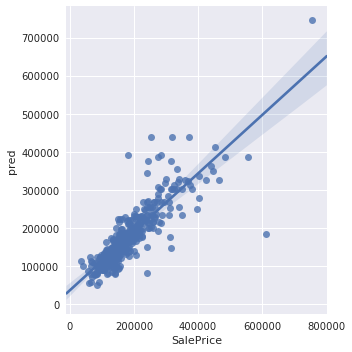

In [43]:
# Lösung
# ideal wäre es wenn alle Werte auf der Winkelhalbierenden liegen
sns.lmplot(x='SalePrice', y='pred', data=results)

Schauen Sie sich außerdem die Verteilung der Residuen, also der Abweichungen des exakten Ergebnis vom Modellergebnis an. Idealerweise sollten diese Normalverteilt sein. Wenn Sie eine ganz andere Verteilung beobachte, dann haben sie vielleicht ein falsches Modell gewählt. Nutzen Sie hierfür die Methode **displot()**.

In [ ]:
# Verteilung der Residuen
sns.distplot(<FILL-IN>)

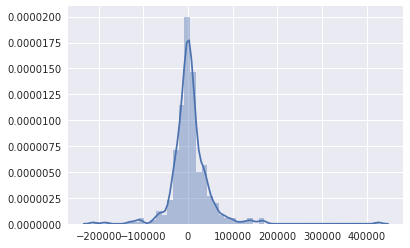

In [44]:
# Lösung
# Fehler soltlen normalverteilt sein. Ansonsten hat man irgendwas komplett falsch gemacht
sns.distplot(results['SalePrice'] - results['pred'])

Berechnen Sie nun den r2_score, also das Quadrat der Pearson Korrelationskoeffizienten. Dafür nutzen Sie bitte die Methode **r2_score** aus dem Modul sklearn.metrics.

In [45]:
# Import
from sklearn.metrics import r2_score

In [ ]:
# r2_score
<FILL-IN>

In [46]:
# Lösung
from sklearn.metrics import r2_score

In [47]:
# Lösung
r2_score(results['SalePrice'], results['pred'])

0.72594569657408037

Ein Ergebnis von 1 wäre prefekt, eins von 0 wäre schlecht. Vereinfacht kann man annehmen, dass die Interpretation dieser Metrik ähnlich ist wie die des Korrelationskoeffizienten.

**Bonus:** Stellen Sie sich vor, dass sie nur ein Feature X haben und ein Targetlabel y. Wenn Sie nun einen Baum trainieren, wieviele Dimensionen hat ihr HyperCube? Zeichnen Sie per Hand einen Scatterplot für einen linearen Zusammenhand zwischen x und y. Zeichnen Sie qualitativ vier HyperCubes ein und die "Vorhersagekurve" des Entscheidungsbaums. Zeichnen Sie zusätzlich grob eine lineare Regressionsgerade.

### Visualisierung des Baums

Wir wollen nun einen Regressionsbaum visualisieren. Da wir zu viele Features haben und der Baum komplett ausgebaut wird erstellen wir einen neuen Baum und definieren die Tiefe des Baums mit dem Hyperparameter **max_depth**.

Aufgabe: Erstellen Sie einen neuen DecisionTreeRegressor mit **max_depth = 3** und nennen Sie dieses Objekt **tree_reg_fixDepth**. Anschließend fitten Sie dieses Modell wieder.

In [ ]:
# Lösung
tree_reg_fixDepth = <FILL-IN>
<FILL-IN>

In [48]:
# Lösung
tree_reg_fixDepth = DecisionTreeRegressor(max_depth=3)
tree_reg_fixDepth.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Für die Visualisierung verwenden wir die Methode **export_graphviz** von sklearn.tree. Anschließend verwenden wir diese und erstellen eine Textfile, welche gerendert werden kann.

In [49]:
from sklearn.tree import export_graphviz

In [50]:
export_graphviz(tree_reg_fixDepth, out_file="tree.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

Since there is no package on the server installed which can render the tree dot-file, we will use a web application.
Please copy the output of the *tree.dot* file (in your jupyter folder) into the window of the webpage http://webgraphviz.com/.

Can you describe the plot? Please try to recompute some of the *values* and *samples* of the first two levels.

Da wir auf dem Server kein Paket zum *Rendern* des Trees installiert haben, benutzen wir eine Webanwendungen.
Kopieren Sie dafür den Output der erstellten Datei *tree.dot* (in ihrem Ordner) in das Fenster auf der Webpage 

Können Sie den angezeigten Baum beschreiben? **Versuchen sie die *values* und *samples* der ersten und zweiten manuell zu berechnen**.

In [ ]:
# Berechnung einiger Werte im Tree

In [51]:
# Lösung
houses_train_num_df[(houses_train_num_df.OverallQual <= 7.5)]['SalePrice'].mean()
len(houses_train_num_df[(houses_train_num_df.OverallQual <= 7.5)]['SalePrice'])

859

Obwohl der Baum nicht so tief ausgebaut wurde ist er nicht viel schlechter als der komplett ausgebaute Baum. Schauen Sie sich den **r2_score** an. Warum ist dieser Baum nicht viel schlechter?

Um die Tiefe des anderen Baums zu erhalten, extrahieren Sie bitte den Ausdruch **tree\_reg.tree_.max_depth**.

In [ ]:
# Tiefe des vorherigen Baums
<FILL-IN>

In [ ]:
# r2 score des neuen Baums
r2_score(<FILL-IN>))

In [52]:
# Lösung
# Tiefe des vorherigen Baums
tree_reg.tree_.max_depth

20

In [53]:
# Lösung
# r2 score des neuen Baums
r2_score(y_test, tree_reg_fixDepth.predict(X_test))

0.7297341260781951

### Random Forest
Ein einzelner Entscheidungsbaum neigt schnell zum Overfitting. Eine Erweiterung ist der sog. Random Forest. Hier werden viele verschiedene unkorrelierte Bäume erzeugt. Wir wollen nun einen Random Forest trainieren und uns den r2 score anschauen. Hierfür laden Sie bitte die Klasse **RandomForestRegressor** von dem Modul **sklearn.ensemble** und erstellen anschließend ein Objekt aus dieser Klasse mit dem Namen **forest_reg**. Wie gewohnt können Sie die **fit** Methode benutzen um ihren Wald zu trainieren. Anschließend berechnen Sie bitte den **r2_score**, plotten wieder ihre Vorhersagen gegen die exakten Werte mittels **sns.lmplot()** und schauen sich die Verteilung der Residuen an.

In [54]:
# Lösung
from sklearn.ensemble import RandomForestRegressor

In [67]:
# Lösung
forest_reg = RandomForestRegressor(n_estimators=10)

In [68]:
# Lösung
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
# Lösung
results_forest = houses_test_df[['SalePrice']].copy()
results_forest['pred'] = forest_reg.predict(X_test)

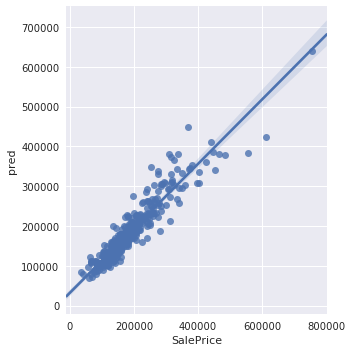

In [70]:
# Lösung
sns.lmplot(x='SalePrice', y='pred', data=results_forest)

In [71]:
# Lösung
r2_score(results_forest['SalePrice'], results_forest['pred'])

0.87869214335052048

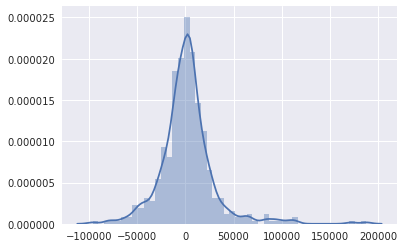

In [72]:
# Lösung
sns.distplot(results_forest['SalePrice'] - results_forest['pred'])

Wissen Sie noch warum der Random Forest ein Ensemble aus unkorrelierten Bäumen ist?

**Bonus:** Spielen Sie mit den Hyperparametern des Random Forest rum und erhöhen Sie beispielsweise die Anzahl der Bäume. Lesen Sie dafür notfalls die Dokumentation oder nutzen Sie wieder *Shift + Tab*.

## Feature Importance
Abschließend möchten wir uns noch die Feature Importance anschauen, um zu wissen bei welchem Feature die *Loss Function*, hier per default der *mean squared error* (mse), am meisten reduziert wurde. Hierfür extrahieren wir das Attribut **feature\_importanes_** des Random Forest **forest\_reg**.
Was erhalten Sie für ein Attribut?  Wie lang ist das Array?

In [ ]:
# Feature Importance
importance_array = forest_reg.<FILL-IN>
importance_array
# Länge

In [73]:
# Lösung
importance_array = forest_reg.feature_importances_
importance_array
len(importance_array)

276

Um ihnen die Zuordnung zu erleichten und die kategorischen Features, welche "OneHotEncoded" wurden zu verknüpfen, habe ich ihnen in dem Notebook *NotebookModule.ipynb* eine Funktion *get\_featureImportance* geschrieben. Diese erwartet als Input das Array und eine Liste der Feature Namen.

In [75]:
# import des Moduls
%run '../../NotebookModule.ipynb'

In [74]:
get_featureImportance(X_train.columns, <FILL-IN>).head(10)

SyntaxError: invalid syntax (<ipython-input-74-252091e231a4>, line 1)

In [76]:
# Lösung
get_featureImportance(X_train.columns, importance_array).head(10)

,importance
OverallQual,0.544406
GrLivArea,0.099599
2ndFlrSF,0.044827
GarageCars,0.039371
BsmtFinSF1,0.030814
LotArea,0.021858
BsmtQual,0.019736
YearBuilt,0.017979
GarageArea,0.017977
TotalBsmtSF,0.017679


## Ende
Damit sind wir am Ende dieser Übung angelangt. Natürlich kann man noch viel bessere Modelle trainieren. Außerdem haben wir den Teil Feature Engineering, also das Generieren neuer Features, komplett vernachlässigt.

Dies werden wir im nächsten Teil des Workshops uns etwas genauer anschauen. Außerdem haben wir gesehen, dass es etwas mühselig ist alle Schritte für den Trainings- und Testdatensatz durchzuführen. Hierfür gibt es das Konzept *Pipelines*, welches wir uns im nächsten Schritt einmal kurz anschauen werden.

In der nächsten Übung schauen wir uns den Titanic Datensatz an. Hier wird die Übung recht kurz und Sie werden im Wesentlichen komplett durch die Übung geführt.